# 2025 F1 Season - Tyre Usage Analysis

This notebook analyzes tyre compound usage (Soft, Medium, Hard) across the 2025 F1 season.

## Analysis Components:
1. **Entire Field Analysis** - % of laps on each compound for all drivers
2. **Top 10 Finishers per Race** - Tyre usage for top 10 in each race
3. **Driver-Level Analysis** - Individual driver tyre usage patterns
4. **Race/Track-Level Analysis** - Tyre usage by circuit

Note: Wet and Intermediate compounds are excluded from this analysis.

In [18]:
# Import required libraries
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
import os

# Create cache directory if it doesn't exist
cache_dir = '/tmp/fastf1_cache'
os.makedirs(cache_dir, exist_ok=True)
fastf1.Cache.enable_cache(cache_dir)  # Enable caching to speed up data loading


print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Collection - Load All 2025 Races

First, we'll load all race sessions from the 2025 season and extract tyre compound information.

In [19]:
# Get 2025 season schedule
schedule_2025 = fastf1.get_event_schedule(2025)
races_2025 = schedule_2025[schedule_2025['EventFormat'] != 'testing']

print(f"Total races in 2025 season: {len(races_2025)}")
print("\nRaces:")
for idx, row in races_2025.iterrows():
    print(f"Round {row['RoundNumber']}: {row['EventName']} - {row['Country']}")

Total races in 2025 season: 24

Races:
Round 1: Australian Grand Prix - Australia
Round 2: Chinese Grand Prix - China
Round 3: Japanese Grand Prix - Japan
Round 4: Bahrain Grand Prix - Bahrain
Round 5: Saudi Arabian Grand Prix - Saudi Arabia
Round 6: Miami Grand Prix - United States
Round 7: Emilia Romagna Grand Prix - Italy
Round 8: Monaco Grand Prix - Monaco
Round 9: Spanish Grand Prix - Spain
Round 10: Canadian Grand Prix - Canada
Round 11: Austrian Grand Prix - Austria
Round 12: British Grand Prix - United Kingdom
Round 13: Belgian Grand Prix - Belgium
Round 14: Hungarian Grand Prix - Hungary
Round 15: Dutch Grand Prix - Netherlands
Round 16: Italian Grand Prix - Italy
Round 17: Azerbaijan Grand Prix - Azerbaijan
Round 18: Singapore Grand Prix - Singapore
Round 19: United States Grand Prix - United States
Round 20: Mexico City Grand Prix - Mexico
Round 21: São Paulo Grand Prix - Brazil
Round 22: Las Vegas Grand Prix - United States
Round 23: Qatar Grand Prix - Qatar
Round 24: Abu D

In [20]:
# Function to get compound mapping (SOFT/MEDIUM/HARD only)
def get_dry_compound(compound):
    """Map compound to SOFT, MEDIUM, HARD, or None for wet compounds"""
    if pd.isna(compound):
        return None
    compound = str(compound).upper()
    if 'SOFT' in compound:
        return 'SOFT'
    elif 'MEDIUM' in compound:
        return 'MEDIUM'
    elif 'HARD' in compound:
        return 'HARD'
    else:
        return None  # Wet/Intermediate compounds

print("Compound mapping function defined.")

Compound mapping function defined.


In [21]:
# Load all race data for 2025 season
all_race_data = []
failed_races = []

for idx, race_row in races_2025.iterrows():
    round_num = race_row['RoundNumber']
    race_name = race_row['EventName']
    country = race_row['Country']
    
    try:
        print(f"Loading Round {round_num}: {race_name}...", end=' ')
        
        # Load race session
        session = fastf1.get_session(2025, round_num, 'R')
        session.load()
        
        # Get laps data
        laps = session.laps
        
        # Get results for finishing positions
        results = session.results
        
        # Add race info to each lap
        laps_with_info = laps.copy()
        laps_with_info['RoundNumber'] = round_num
        laps_with_info['RaceName'] = race_name
        laps_with_info['Country'] = country
        
        # Map compounds to SOFT/MEDIUM/HARD
        laps_with_info['CompoundType'] = laps_with_info['Compound'].apply(get_dry_compound)
        
        # Merge with results to get finishing positions
        laps_with_info = laps_with_info.merge(
            results[['Abbreviation', 'Position', 'Points']],
            left_on='Driver',
            right_on='Abbreviation',
            how='left'
        )
        
        all_race_data.append(laps_with_info)
        print(f"✓ Loaded {len(laps_with_info)} laps")
        
    except Exception as e:
        print(f"✗ Failed: {str(e)}")
        failed_races.append((round_num, race_name, str(e)))

# Combine all race data
if all_race_data:
    all_laps_df = pd.concat(all_race_data, ignore_index=True)
    print(f"\n{'='*60}")
    print(f"Successfully loaded {len(all_race_data)} races")
    print(f"Total laps collected: {len(all_laps_df):,}")
    
    if failed_races:
        print(f"\nFailed to load {len(failed_races)} races:")
        for round_num, name, error in failed_races:
            print(f"  Round {round_num}: {name} - {error}")
else:
    print("No race data could be loaded!")

core           INFO 	Loading data for Australian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


Loading Round 1: Australian Grand Prix... 

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '87'
core        WARNING 	Fixed incorrect tyre stint information for driver '30'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.022000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '2

✓ Loaded 927 laps
Loading Round 2: Chinese Grand Prix... 

core           INFO 	Loading data for Chinese Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '31', '12', '23', '87', '18', '55', '6', '30', '7', '5', '27', '22', '14', '16', '44', '10']
core           INFO 	Loading data for Japanese Grand Prix - Rac

✓ Loaded 1065 laps
Loading Round 3: Japanese Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '12', '44', '6', '23', '87', '14', '22', '10', '55', '7', '27', '30', '31', '5', '18']
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


✓ Loaded 1059 laps
Loading Round 4: Bahrain Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '16', '44', '1', '10', '31', '22', '87', '12', '23', '6', '7', '14', '30', '18', '5', '55', '27']
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


✓ Loaded 1128 laps
Loading Round 5: Saudi Arabian Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31', '27', '18', '7', '5', '22', '10']
core           INFO 	Loading data for Miami Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


✓ Loaded 898 laps
Loading Round 6: Miami Grand Prix... 

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information for driver '6'
core        WARNING 	Fixed incorrect tyre stint information for driver '31'
core        WARNING 	Fixed incorrect tyre stint information for driver '18'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 81 completed the race distance 00:00.036000 before the recorded end of the session.
core    

✓ Loaded 1005 laps
Loading Round 7: Emilia Romagna Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '44', '23', '16', '63', '55', '6', '22', '14', '27', '10', '30', '18', '43', '87', '5', '12', '31']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


✓ Loaded 1207 laps
Loading Round 8: Monaco Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '81', '1', '44', '6', '31', '30', '23', '55', '63', '87', '43', '5', '18', '27', '22', '12', '14', '10']
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


✓ Loaded 1425 laps
Loading Round 9: Spanish Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['81', '4', '16', '63', '27', '44', '6', '10', '14', '1', '30', '5', '22', '55', '43', '31', '87', '12', '23']
core           INFO 	Loading data for Canadian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


✓ Loaded 1203 laps
Loading Round 10: Canadian Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']
core           INFO 	Loading data for Austrian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data


✓ Loaded 1349 laps
Loading Round 11: Austrian Grand Prix... 

req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '16', '44', '63', '30', '14', '5', '27', '31', '87', '6', '10', '18', '43', '22', '23', '1', '12', '55']
core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_da

✓ Loaded 1127 laps
Loading Round 12: British Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '27', '44', '1', '10', '18', '23', '14', '63', '87', '55', '31', '16', '22', '12', '6', '5', '30', '43']
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Fixed incorrect tyre stint information fo

✓ Loaded 826 laps
Loading Round 13: Belgian Grand Prix... 

core        WARNING 	Fixed incorrect tyre stint information for driver '16'
core        WARNING 	Fixed incorrect tyre stint information for driver '1'
core        WARNING 	Fixed incorrect tyre stint information for driver '63'
core        WARNING 	Fixed incorrect tyre stint information for driver '23'
core        WARNING 	Fixed incorrect tyre stint information for driver '44'
core        WARNING 	Fixed incorrect tyre stint information for driver '30'
core        WARNING 	Fixed incorrect tyre stint information for driver '5'
core        WARNING 	Fixed incorrect tyre stint information for driver '10'
core        WARNING 	Fixed incorrect tyre stint information for driver '87'
core        WARNING 	Fixed incorrect tyre stint information for driver '27'
core        WARNING 	Fixed incorrect tyre stint information for driver '22'
core        WARNING 	Fixed incorrect tyre stint information for driver '18'
core        WARNING 	Fixed incorrect tyre stint information for driver '31'
core        WA

✓ Loaded 879 laps
Loading Round 14: Hungarian Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '81', '63', '16', '14', '5', '18', '30', '1', '12', '6', '44', '27', '55', '23', '31', '22', '43', '10', '87']
core           INFO 	Loading data for Dutch Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


✓ Loaded 1368 laps
Loading Round 15: Dutch Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '6', '63', '23', '87', '18', '14', '22', '31', '43', '30', '55', '27', '5', '12', '10', '4', '16', '44']
core           INFO 	Loading data for Italian Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


✓ Loaded 1364 laps
Loading Round 16: Italian Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '63', '44', '23', '5', '12', '6', '55', '87', '22', '30', '31', '10', '43', '18', '14', '27']
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


✓ Loaded 975 laps
Loading Round 17: Azerbaijan Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.015000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '55', '12', '30', '22', '4', '44', '16', '6', '5', '87', '23', '31', '14', '27', '18', '10', '43', '81']
core           INFO 	Loading data for Singapore Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_d

✓ Loaded 968 laps
Loading Round 18: Singapore Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '4', '81', '12', '16', '14', '44', '87', '55', '6', '22', '18', '23', '30', '43', '5', '31', '10', '27']
core           INFO 	Loading data for United States Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


✓ Loaded 1229 laps
Loading Round 19: United States Grand Prix... 

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '16', '44', '81', '63', '22', '27', '87', '14', '30', '18', '12', '23', '31', '6', '43', '5', '10', '55']
core           INFO 	Loading data for Mexico City Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_

✓ Loaded 1067 laps
Loading Round 20: Mexico City Grand Prix... 

req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '16', '1', '87', '81', '12', '63', '44', '31', '5', '22', '23', '6', '18', '10', '43', '55', '14', '27', '30']
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_

✓ Loaded 1263 laps
Loading Round 21: São Paulo Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.010000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['4', '12', '1', '63', '81', '87', '30', '6', '27', '10', '23', '31', '55', '14', '43', '18', '22', '44', '16', '5']
core           INFO 	Loading data for Las Vegas Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_d

✓ Loaded 1251 laps
Loading Round 22: Las Vegas Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '63', '12', '16', '55', '6', '27', '44', '31', '87', '14', '22', '10', '30', '43', '23', '5', '18', '4', '81']
core           INFO 	Loading data for Qatar Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


✓ Loaded 886 laps
Loading Round 23: Qatar Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '55', '4', '12', '63', '14', '16', '30', '22', '23', '44', '5', '43', '31', '10', '18', '6', '87', '27']
core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.7.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


✓ Loaded 1067 laps
Loading Round 24: Abu Dhabi Grand Prix... 

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '81', '4', '16', '63', '14', '31', '44', '27', '18', '5', '87', '55', '22', '12', '23', '6', '30', '10', '43']


✓ Loaded 1156 laps

Successfully loaded 24 races
Total laps collected: 26,692


In [22]:
# Filter out wet/intermediate laps (keep only dry compounds)
dry_laps_df = all_laps_df[all_laps_df['CompoundType'].notna()].copy()

print(f"Total laps (all compounds): {len(all_laps_df):,}")
print(f"Dry compound laps only: {len(dry_laps_df):,}")
print(f"Excluded laps (wet/intermediate): {len(all_laps_df) - len(dry_laps_df):,}")
print(f"\nDry compound distribution:")
print(dry_laps_df['CompoundType'].value_counts())
print(f"\n✓ Columns in dry_laps_df: {list(dry_laps_df.columns)}")

Total laps (all compounds): 26,692
Dry compound laps only: 24,592
Excluded laps (wet/intermediate): 2,100

Dry compound distribution:
CompoundType
HARD      10843
MEDIUM    10444
SOFT       3305
Name: count, dtype: int64

✓ Columns in dry_laps_df: ['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest', 'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime', 'LapStartDate', 'TrackStatus', 'Position_x', 'Deleted', 'DeletedReason', 'FastF1Generated', 'IsAccurate', 'RoundNumber', 'RaceName', 'Country', 'CompoundType', 'Abbreviation', 'Position_y', 'Points']


## 2. Entire Field Analysis

Calculate tyre usage percentages across all drivers for the entire 2025 season.

In [23]:
# Calculate entire field tyre usage
entire_field_stats = {
    'SOFT': (dry_laps_df['CompoundType'] == 'SOFT').sum(),
    'MEDIUM': (dry_laps_df['CompoundType'] == 'MEDIUM').sum(),
    'HARD': (dry_laps_df['CompoundType'] == 'HARD').sum()
}

total_dry_laps = sum(entire_field_stats.values())

entire_field_percentages = {
    compound: (count / total_dry_laps * 100) 
    for compound, count in entire_field_stats.items()
}

# Create DataFrame for entire field
entire_field_df = pd.DataFrame([
    {
        'Compound': 'SOFT',
        'Total_Laps': entire_field_stats['SOFT'],
        'Percentage': entire_field_percentages['SOFT']
    },
    {
        'Compound': 'MEDIUM',
        'Total_Laps': entire_field_stats['MEDIUM'],
        'Percentage': entire_field_percentages['MEDIUM']
    },
    {
        'Compound': 'HARD',
        'Total_Laps': entire_field_stats['HARD'],
        'Percentage': entire_field_percentages['HARD']
    }
])

print("\n" + "="*60)
print("2025 SEASON - ENTIRE FIELD TYRE USAGE")
print("="*60)
print(f"\nTotal dry compound laps: {total_dry_laps:,}\n")
print(entire_field_df.to_string(index=False))
print("\n" + "="*60)


2025 SEASON - ENTIRE FIELD TYRE USAGE

Total dry compound laps: 24,592

Compound  Total_Laps  Percentage
    SOFT        3305   13.439330
  MEDIUM       10444   42.469096
    HARD       10843   44.091574



## 3. Top 10 Finishers Analysis (Per Race)

Analyze tyre usage for the top 10 finishers in each race.

In [24]:
# Filter for top 10 finishers only
# Use Position_y which comes from the results merge (final race position)
top10_laps = dry_laps_df[dry_laps_df['Position_y'] <= 10].copy()

print(f"Total laps by top 10 finishers: {len(top10_laps):,}")
print(f"\nTop 10 finishers compound distribution:")
print(top10_laps['CompoundType'].value_counts())

Total laps by top 10 finishers: 13,214

Top 10 finishers compound distribution:
CompoundType
MEDIUM    5820
HARD      5726
SOFT      1668
Name: count, dtype: int64


In [25]:
# Calculate top 10 aggregate stats
top10_stats = {
    'SOFT': (top10_laps['CompoundType'] == 'SOFT').sum(),
    'MEDIUM': (top10_laps['CompoundType'] == 'MEDIUM').sum(),
    'HARD': (top10_laps['CompoundType'] == 'HARD').sum()
}

total_top10_laps = sum(top10_stats.values())

top10_percentages = {
    compound: (count / total_top10_laps * 100) 
    for compound, count in top10_stats.items()
}

# Create DataFrame for top 10
top10_aggregate_df = pd.DataFrame([
    {
        'Compound': 'SOFT',
        'Total_Laps': top10_stats['SOFT'],
        'Percentage': top10_percentages['SOFT']
    },
    {
        'Compound': 'MEDIUM',
        'Total_Laps': top10_stats['MEDIUM'],
        'Percentage': top10_percentages['MEDIUM']
    },
    {
        'Compound': 'HARD',
        'Total_Laps': top10_stats['HARD'],
        'Percentage': top10_percentages['HARD']
    }
])

print("\n" + "="*60)
print("2025 SEASON - TOP 10 FINISHERS TYRE USAGE (AGGREGATE)")
print("="*60)
print(f"\nTotal dry compound laps: {total_top10_laps:,}\n")
print(top10_aggregate_df.to_string(index=False))
print("\n" + "="*60)


2025 SEASON - TOP 10 FINISHERS TYRE USAGE (AGGREGATE)

Total dry compound laps: 13,214

Compound  Total_Laps  Percentage
    SOFT        1668   12.622976
  MEDIUM        5820   44.044196
    HARD        5726   43.332829



In [26]:
# Race-by-race breakdown for top 10 finishers
race_level_top10_data = []

for round_num in sorted(top10_laps['RoundNumber'].unique()):
    race_laps = top10_laps[top10_laps['RoundNumber'] == round_num]
    race_name = race_laps['RaceName'].iloc[0]
    
    soft_count = (race_laps['CompoundType'] == 'SOFT').sum()
    medium_count = (race_laps['CompoundType'] == 'MEDIUM').sum()
    hard_count = (race_laps['CompoundType'] == 'HARD').sum()
    total = soft_count + medium_count + hard_count
    
    if total > 0:
        race_level_top10_data.append({
            'Round': round_num,
            'Race': race_name,
            'SOFT_Laps': soft_count,
            'SOFT_Pct': (soft_count / total * 100),
            'MEDIUM_Laps': medium_count,
            'MEDIUM_Pct': (medium_count / total * 100),
            'HARD_Laps': hard_count,
            'HARD_Pct': (hard_count / total * 100),
            'Total_Laps': total
        })

race_level_top10_df = pd.DataFrame(race_level_top10_data)

print("\n" + "="*80)
print("TOP 10 FINISHERS TYRE USAGE - RACE BY RACE BREAKDOWN")
print("="*80)
print(race_level_top10_df.to_string(index=False))
print("\n" + "="*80)


TOP 10 FINISHERS TYRE USAGE - RACE BY RACE BREAKDOWN
 Round                      Race  SOFT_Laps  SOFT_Pct  MEDIUM_Laps  MEDIUM_Pct  HARD_Laps  HARD_Pct  Total_Laps
     1     Australian Grand Prix          0  0.000000           34   30.088496         79 69.911504         113
     2        Chinese Grand Prix          0  0.000000          166   29.642857        394 70.357143         560
     3       Japanese Grand Prix          0  0.000000          228   43.018868        302 56.981132         530
     4        Bahrain Grand Prix        165 28.947368          262   45.964912        143 25.087719         570
     5  Saudi Arabian Grand Prix          0  0.000000          206   41.200000        294 58.800000         500
     6          Miami Grand Prix          0  0.000000          114   34.441088        217 65.558912         331
     7 Emilia Romagna Grand Prix          0  0.000000          211   33.492063        419 66.507937         630
     8         Monaco Grand Prix         15  1.940

## 4. Driver-Level Analysis

Analyze tyre usage patterns for individual drivers across the season.

In [27]:
# Calculate driver-level tyre usage
driver_level_data = []

for driver in sorted(dry_laps_df['Driver'].unique()):
    driver_laps = dry_laps_df[dry_laps_df['Driver'] == driver]
    
    soft_count = (driver_laps['CompoundType'] == 'SOFT').sum()
    medium_count = (driver_laps['CompoundType'] == 'MEDIUM').sum()
    hard_count = (driver_laps['CompoundType'] == 'HARD').sum()
    total = soft_count + medium_count + hard_count
    
    if total > 0:
        driver_level_data.append({
            'Driver': driver,
            'SOFT_Laps': soft_count,
            'SOFT_Pct': (soft_count / total * 100),
            'MEDIUM_Laps': medium_count,
            'MEDIUM_Pct': (medium_count / total * 100),
            'HARD_Laps': hard_count,
            'HARD_Pct': (hard_count / total * 100),
            'Total_Laps': total
        })

driver_level_df = pd.DataFrame(driver_level_data)
driver_level_df = driver_level_df.sort_values('Total_Laps', ascending=False)

print("\n" + "="*100)
print("DRIVER-LEVEL TYRE USAGE - 2025 SEASON")
print("="*100)
print(driver_level_df.to_string(index=False))
print("\n" + "="*100)


DRIVER-LEVEL TYRE USAGE - 2025 SEASON
Driver  SOFT_Laps  SOFT_Pct  MEDIUM_Laps  MEDIUM_Pct  HARD_Laps  HARD_Pct  Total_Laps
   RUS        187 14.049587          516   38.767844        628 47.182569        1331
   NOR        134 10.260337          610   46.707504        562 43.032159        1306
   HAD        174 13.394919          462   35.565820        663 51.039261        1299
   OCO         56  4.395604          489   38.383046        729 57.221350        1274
   PIA        151 11.908517          567   44.716088        550 43.375394        1268
   TSU        233 18.418972          502   39.683794        530 41.897233        1265
   BEA        163 12.977707          560   44.585987        533 42.436306        1256
   VER        183 14.604948          550   43.894653        520 41.500399        1253
   LEC         91  7.297514          594   47.634322        562 45.068164        1247
   HAM        152 12.238325          582   46.859903        508 40.901771        1242
   LAW        2

In [28]:
# Function to filter and display selected drivers
def show_driver_stats(driver_list):
    """
    Display tyre usage stats for selected drivers.
    
    Parameters:
    driver_list: list of driver abbreviations (e.g., ['VER', 'HAM', 'LEC'])
    """
    selected_df = driver_level_df[driver_level_df['Driver'].isin(driver_list)]
    
    if len(selected_df) == 0:
        print("No matching drivers found!")
        print(f"Available drivers: {sorted(driver_level_df['Driver'].unique())}")
        return None
    
    print("\n" + "="*100)
    print(f"SELECTED DRIVERS TYRE USAGE - 2025 SEASON")
    print("="*100)
    print(selected_df.to_string(index=False))
    print("\n" + "="*100)
    
    return selected_df

# Example: Show stats for specific drivers (modify as needed)
# Uncomment and modify the driver list below:
# example_drivers = ['VER', 'HAM', 'LEC', 'NOR', 'PIA']
# show_driver_stats(example_drivers)

print("Function 'show_driver_stats()' is ready to use!")
print(f"\nAvailable drivers: {sorted(driver_level_df['Driver'].unique())}")

Function 'show_driver_stats()' is ready to use!

Available drivers: ['ALB', 'ALO', 'ANT', 'BEA', 'BOR', 'COL', 'DOO', 'GAS', 'HAD', 'HAM', 'HUL', 'LAW', 'LEC', 'NOR', 'OCO', 'PIA', 'RUS', 'SAI', 'STR', 'TSU', 'VER']


## 5. Race/Track Level Analysis

Analyze tyre usage patterns at each circuit.

In [29]:
# Calculate race/track-level tyre usage
race_level_data = []

for round_num in sorted(dry_laps_df['RoundNumber'].unique()):
    race_laps = dry_laps_df[dry_laps_df['RoundNumber'] == round_num]
    race_name = race_laps['RaceName'].iloc[0]
    country = race_laps['Country'].iloc[0]
    
    soft_count = (race_laps['CompoundType'] == 'SOFT').sum()
    medium_count = (race_laps['CompoundType'] == 'MEDIUM').sum()
    hard_count = (race_laps['CompoundType'] == 'HARD').sum()
    total = soft_count + medium_count + hard_count
    
    if total > 0:
        race_level_data.append({
            'Round': round_num,
            'Race': race_name,
            'Country': country,
            'SOFT_Laps': soft_count,
            'SOFT_Pct': (soft_count / total * 100),
            'MEDIUM_Laps': medium_count,
            'MEDIUM_Pct': (medium_count / total * 100),
            'HARD_Laps': hard_count,
            'HARD_Pct': (hard_count / total * 100),
            'Total_Laps': total
        })

race_level_df = pd.DataFrame(race_level_data)

print("\n" + "="*110)
print("RACE/TRACK-LEVEL TYRE USAGE - 2025 SEASON")
print("="*110)
print(race_level_df.to_string(index=False))
print("\n" + "="*110)


RACE/TRACK-LEVEL TYRE USAGE - 2025 SEASON
 Round                      Race              Country  SOFT_Laps  SOFT_Pct  MEDIUM_Laps  MEDIUM_Pct  HARD_Laps  HARD_Pct  Total_Laps
     1     Australian Grand Prix            Australia          0  0.000000           85   48.022599         92 51.977401         177
     2        Chinese Grand Prix                China          0  0.000000          284   26.666667        781 73.333333        1065
     3       Japanese Grand Prix                Japan         64  6.043437          452   42.681775        543 51.274788        1059
     4        Bahrain Grand Prix              Bahrain        295 26.152482          517   45.833333        316 28.014184        1128
     5  Saudi Arabian Grand Prix         Saudi Arabia          0  0.000000          294   32.739421        604 67.260579         898
     6          Miami Grand Prix        United States          0  0.000000          189   33.810376        370 66.189624         559
     7 Emilia Romagna Gran

## 6. Export Data for Visualization

Save all processed datasets for future visualization work.

In [30]:
# Create output directory
import os
output_dir = '../f1_visualizations/2025_tyre_data'
os.makedirs(output_dir, exist_ok=True)

# Save all datasets
entire_field_df.to_csv(f'{output_dir}/entire_field_tyre_usage.csv', index=False)
top10_aggregate_df.to_csv(f'{output_dir}/top10_aggregate_tyre_usage.csv', index=False)
race_level_top10_df.to_csv(f'{output_dir}/race_level_top10_tyre_usage.csv', index=False)
driver_level_df.to_csv(f'{output_dir}/driver_level_tyre_usage.csv', index=False)
race_level_df.to_csv(f'{output_dir}/race_level_tyre_usage.csv', index=False)

# Also save raw laps data for further analysis if needed
dry_laps_df.to_csv(f'{output_dir}/all_dry_laps_2025.csv', index=False)

print("✓ All datasets saved to:", output_dir)
print("\nFiles created:")
print("  - entire_field_tyre_usage.csv")
print("  - top10_aggregate_tyre_usage.csv")
print("  - race_level_top10_tyre_usage.csv")
print("  - driver_level_tyre_usage.csv")
print("  - race_level_tyre_usage.csv")
print("  - all_dry_laps_2025.csv (raw data)")

✓ All datasets saved to: ../f1_visualizations/2025_tyre_data

Files created:
  - entire_field_tyre_usage.csv
  - top10_aggregate_tyre_usage.csv
  - race_level_top10_tyre_usage.csv
  - driver_level_tyre_usage.csv
  - race_level_tyre_usage.csv
  - all_dry_laps_2025.csv (raw data)


## Summary Statistics

In [31]:
# Print comprehensive summary
print("\n" + "#"*80)
print("#" + " "*78 + "#")
print("#" + "  2025 F1 SEASON - TYRE USAGE ANALYSIS SUMMARY".center(78) + "#")
print("#" + " "*78 + "#")
print("#"*80)

print("\n📊 DATA COLLECTION")
print("─" * 80)
print(f"Total races loaded: {len(all_race_data)}")
print(f"Total laps collected: {len(all_laps_df):,}")
print(f"Dry compound laps: {len(dry_laps_df):,}")
print(f"Wet/Intermediate laps excluded: {len(all_laps_df) - len(dry_laps_df):,}")

print("\n🏁 ENTIRE FIELD BREAKDOWN")
print("─" * 80)
for _, row in entire_field_df.iterrows():
    print(f"{row['Compound']:7} : {row['Total_Laps']:6,} laps ({row['Percentage']:5.2f}%)")

print("\n🏆 TOP 10 FINISHERS BREAKDOWN")
print("─" * 80)
for _, row in top10_aggregate_df.iterrows():
    print(f"{row['Compound']:7} : {row['Total_Laps']:6,} laps ({row['Percentage']:5.2f}%)")

print("\n👤 DRIVER ANALYSIS")
print("─" * 80)
print(f"Total unique drivers: {len(driver_level_df)}")
print(f"Most laps completed: {driver_level_df.iloc[0]['Driver']} ({driver_level_df.iloc[0]['Total_Laps']:,} laps)")

print("\n🏎️ RACE/TRACK ANALYSIS")
print("─" * 80)
print(f"Total races analyzed: {len(race_level_df)}")

# Find most soft/medium/hard dependent races
most_soft_race = race_level_df.loc[race_level_df['SOFT_Pct'].idxmax()]
most_medium_race = race_level_df.loc[race_level_df['MEDIUM_Pct'].idxmax()]
most_hard_race = race_level_df.loc[race_level_df['HARD_Pct'].idxmax()]

print(f"Most SOFT dependent: {most_soft_race['Race']} ({most_soft_race['SOFT_Pct']:.1f}%)")
print(f"Most MEDIUM dependent: {most_medium_race['Race']} ({most_medium_race['MEDIUM_Pct']:.1f}%)")
print(f"Most HARD dependent: {most_hard_race['Race']} ({most_hard_race['HARD_Pct']:.1f}%)")

print("\n" + "#"*80)
print("\n✅ Data processing complete! Ready for visualization.")


################################################################################
#                                                                              #
#                  2025 F1 SEASON - TYRE USAGE ANALYSIS SUMMARY                #
#                                                                              #
################################################################################

📊 DATA COLLECTION
────────────────────────────────────────────────────────────────────────────────
Total races loaded: 24
Total laps collected: 26,692
Dry compound laps: 24,592
Wet/Intermediate laps excluded: 2,100

🏁 ENTIRE FIELD BREAKDOWN
────────────────────────────────────────────────────────────────────────────────
SOFT    :  3,305 laps (13.44%)
MEDIUM  : 10,444 laps (42.47%)
HARD    : 10,843 laps (44.09%)

🏆 TOP 10 FINISHERS BREAKDOWN
────────────────────────────────────────────────────────────────────────────────
SOFT    :  1,668 laps (12.62%)
MEDIUM  :  5,820 laps (44.04%)
HARD 

## 7. Visualizations

Create plots for Instagram and Medium articles.

### 7.1 Entire Field Tyre Usage - Season Aggregate

Bar plot showing the overall tyre compound distribution across the entire 2025 season.

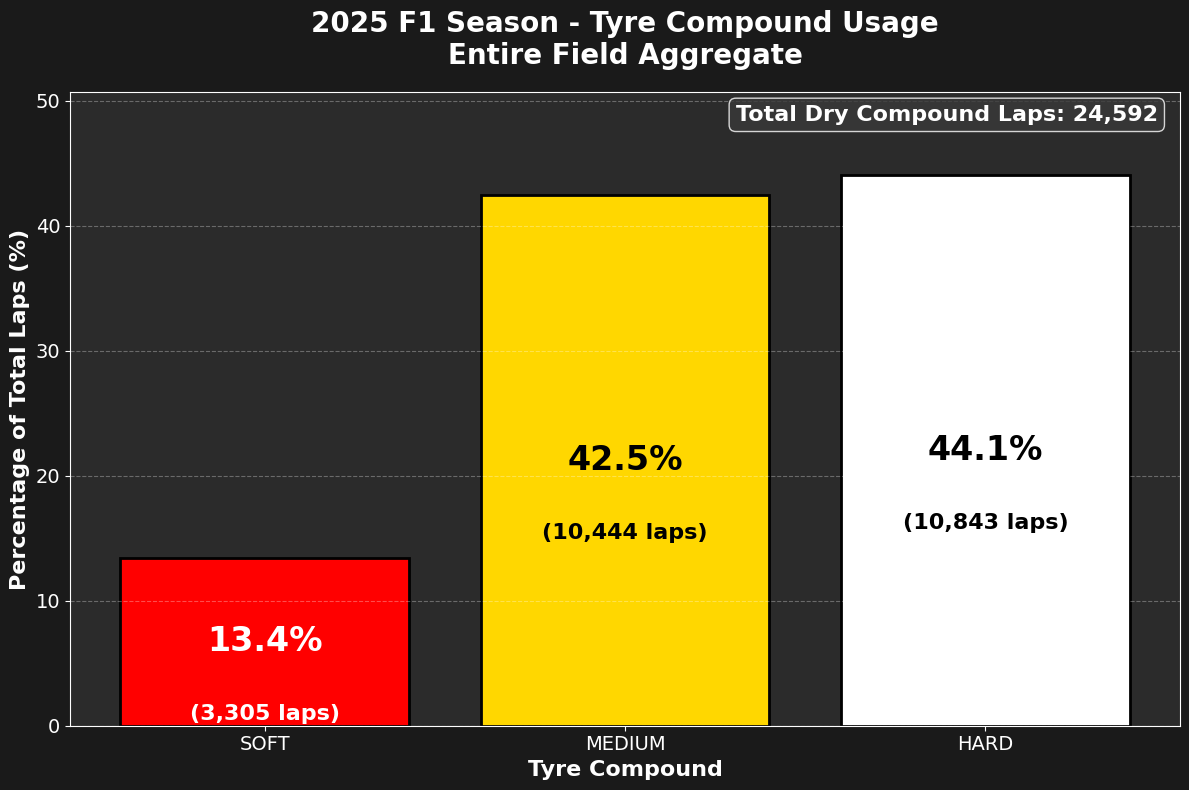

✓ Plot saved: ../f1_visualizations/2025_entire_field_tyre_usage.png


In [32]:
# Create bar plot for entire field tyre usage
fig, ax = plt.subplots(figsize=(12, 8), facecolor='#1a1a1a')
ax.set_facecolor('#2b2b2b')

# Define F1 tyre colors
tyre_colors = {
    'SOFT': '#FF0000',      # Red
    'MEDIUM': '#FFD700',    # Yellow/Gold
    'HARD': '#FFFFFF'       # White
}

# Order compounds
compounds = ['SOFT', 'MEDIUM', 'HARD']
percentages = [entire_field_df[entire_field_df['Compound'] == c]['Percentage'].values[0] for c in compounds]
total_laps = [entire_field_df[entire_field_df['Compound'] == c]['Total_Laps'].values[0] for c in compounds]
colors = [tyre_colors[c] for c in compounds]

# Create bars
bars = ax.bar(compounds, percentages, color=colors, edgecolor='black', linewidth=2)

# Add percentage labels on bars
for i, (bar, pct, laps) in enumerate(zip(bars, percentages, total_laps)):
    height = bar.get_height()
    # Percentage text
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            f'{pct:.1f}%',
            ha='center', va='center', fontsize=24, fontweight='bold',
            color='black' if compounds[i] != 'SOFT' else 'white')
    
    # Total laps text below percentage
    ax.text(bar.get_x() + bar.get_width()/2., height/2 - 5,
            f'({laps:,} laps)',
            ha='center', va='top', fontsize=16, fontweight='bold',
            color='black' if compounds[i] != 'SOFT' else 'white')

# Styling
ax.set_ylabel('Percentage of Total Laps (%)', fontsize=16, fontweight='bold', color='white')
ax.set_xlabel('Tyre Compound', fontsize=16, fontweight='bold', color='white')
ax.set_title('2025 F1 Season - Tyre Compound Usage\nEntire Field Aggregate', 
             fontsize=20, fontweight='bold', pad=20, color='white')
ax.set_ylim(0, max(percentages) * 1.15)
ax.tick_params(axis='both', labelsize=14, colors='white')
ax.grid(axis='y', alpha=0.3, linestyle='--', color='white')

# Change spine colors to white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Add total laps info
total_info = f'Total Dry Compound Laps: {sum(total_laps):,}'
ax.text(0.98, 0.98, total_info, transform=ax.transAxes,
        fontsize=16, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='#3a3a3a', alpha=0.8, edgecolor='white'),
        color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('../f1_visualizations/2025_entire_field_tyre_usage.png', dpi=300, bbox_inches='tight', facecolor='#1a1a1a')
plt.show()

print("✓ Plot saved: ../f1_visualizations/2025_entire_field_tyre_usage.png")

In [33]:
### 7.2 Horizontal Stacked Bar Chart - Championship Leaders + Aggregates

Comparing tyre usage for top 5 championship drivers, top 10 finishers, and entire field.

SyntaxError: invalid syntax (2451302450.py, line 3)

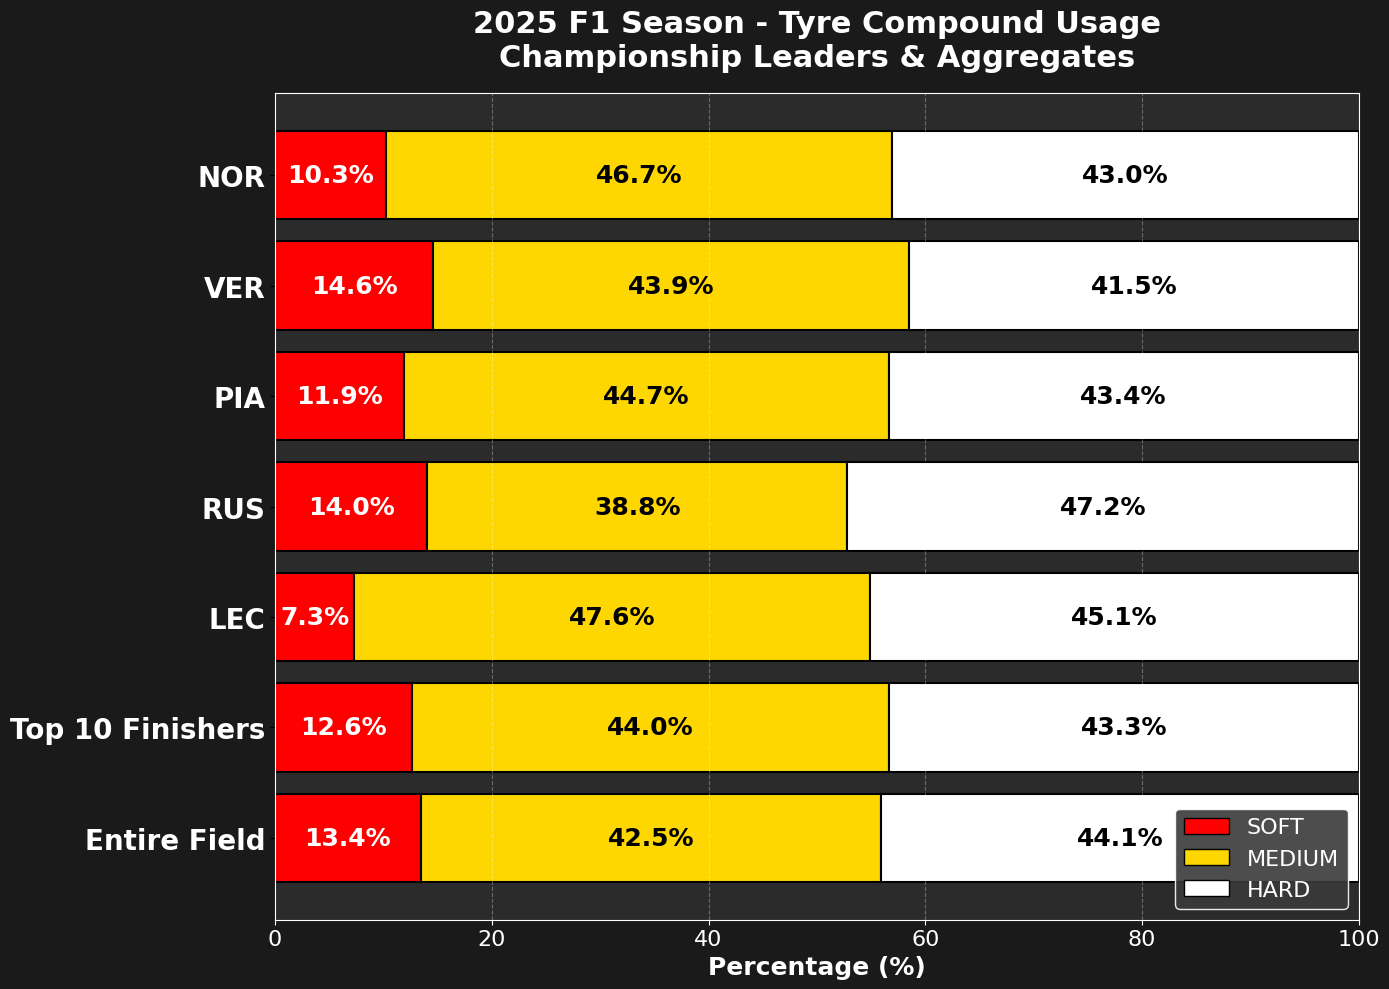

✓ Plot saved: ../f1_visualizations/2025_tyre_usage_stacked_comparison.png


In [ ]:
# Create horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10), facecolor='#1a1a1a')
ax.set_facecolor('#2b2b2b')

# Define F1 tyre colors
tyre_colors = {
    'SOFT': '#FF0000',      # Red
    'MEDIUM': '#FFD700',    # Yellow/Gold
    'HARD': '#FFFFFF'       # White
}

# Top 5 championship order (based on 2025 standings)
top_5_drivers = ['NOR', 'VER', 'PIA', 'RUS', 'LEC']

# Prepare data for plotting
categories = []
soft_pcts = []
medium_pcts = []
hard_pcts = []

# Add top 5 drivers
for driver in top_5_drivers:
    driver_data = driver_level_df[driver_level_df['Driver'] == driver]
    if len(driver_data) > 0:
        categories.append(driver)
        soft_pcts.append(driver_data['SOFT_Pct'].values[0])
        medium_pcts.append(driver_data['MEDIUM_Pct'].values[0])
        hard_pcts.append(driver_data['HARD_Pct'].values[0])

# Add Top 10 Finishers
categories.append('Top 10 Finishers')
soft_pcts.append(top10_aggregate_df[top10_aggregate_df['Compound'] == 'SOFT']['Percentage'].values[0])
medium_pcts.append(top10_aggregate_df[top10_aggregate_df['Compound'] == 'MEDIUM']['Percentage'].values[0])
hard_pcts.append(top10_aggregate_df[top10_aggregate_df['Compound'] == 'HARD']['Percentage'].values[0])

# Add Entire Field
categories.append('Entire Field')
soft_pcts.append(entire_field_df[entire_field_df['Compound'] == 'SOFT']['Percentage'].values[0])
medium_pcts.append(entire_field_df[entire_field_df['Compound'] == 'MEDIUM']['Percentage'].values[0])
hard_pcts.append(entire_field_df[entire_field_df['Compound'] == 'HARD']['Percentage'].values[0])

# Reverse the order so NOR is on top, Entire Field at bottom
categories.reverse()
soft_pcts.reverse()
medium_pcts.reverse()
hard_pcts.reverse()

# Create horizontal stacked bars
y_pos = np.arange(len(categories))

# Plot bars (stacked)
bar1 = ax.barh(y_pos, soft_pcts, color=tyre_colors['SOFT'], edgecolor='black', linewidth=1.5)
bar2 = ax.barh(y_pos, medium_pcts, left=soft_pcts, color=tyre_colors['MEDIUM'], edgecolor='black', linewidth=1.5)
bar3 = ax.barh(y_pos, hard_pcts, left=np.array(soft_pcts) + np.array(medium_pcts), 
               color=tyre_colors['HARD'], edgecolor='black', linewidth=1.5)

# Add percentage labels inside bars
for i in range(len(categories)):
    # SOFT label
    if soft_pcts[i] > 5:  # Only show if segment is large enough
        ax.text(soft_pcts[i]/2, i, f'{soft_pcts[i]:.1f}%', 
                ha='center', va='center', fontsize=18, fontweight='bold', color='white')
    
    # MEDIUM label
    if medium_pcts[i] > 5:
        ax.text(soft_pcts[i] + medium_pcts[i]/2, i, f'{medium_pcts[i]:.1f}%',
                ha='center', va='center', fontsize=18, fontweight='bold', color='black')
    
    # HARD label
    if hard_pcts[i] > 5:
        ax.text(soft_pcts[i] + medium_pcts[i] + hard_pcts[i]/2, i, f'{hard_pcts[i]:.1f}%',
                ha='center', va='center', fontsize=18, fontweight='bold', color='black')

# Styling
ax.set_yticks(y_pos)
ax.set_yticklabels(categories, fontsize=20, fontweight='bold', color='white')
ax.set_xlabel('Percentage (%)', fontsize=18, fontweight='bold', color='white')
ax.set_title('2025 F1 Season - Tyre Compound Usage\nChampionship Leaders & Aggregates', 
             fontsize=22, fontweight='bold', pad=20, color='white')
ax.set_xlim(0, 100)
ax.tick_params(axis='x', labelsize=16, colors='white')
ax.grid(axis='x', alpha=0.3, linestyle='--', color='white')

# Change spine colors
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=tyre_colors['SOFT'], edgecolor='black', label='SOFT'),
    Patch(facecolor=tyre_colors['MEDIUM'], edgecolor='black', label='MEDIUM'),
    Patch(facecolor=tyre_colors['HARD'], edgecolor='black', label='HARD')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=16, 
          framealpha=0.9, facecolor='#3a3a3a', edgecolor='white', labelcolor='white')

plt.tight_layout()
plt.savefig('../f1_visualizations/2025_tyre_usage_stacked_comparison.png', 
            dpi=300, bbox_inches='tight', facecolor='#1a1a1a')
plt.show()

print("✓ Plot saved: ../f1_visualizations/2025_tyre_usage_stacked_comparison.png")

### Additional Analysis - Races Without Soft Tyres

Identify races where soft compound was not used at all.

In [34]:
# Find races with zero soft tyre usage
races_without_soft = race_level_df[race_level_df['SOFT_Pct'] <= 5]

print("="*80)
print("RACES WITHOUT SOFT TYRE USAGE (0 LAPS)")
print("="*80)
print(f"\nTotal races without soft tyres: {len(races_without_soft)} out of {len(race_level_df)}\n")

if len(races_without_soft) > 0:
    print("Races with 0 soft tyre laps:")
    print(races_without_soft[['Round', 'Race', 'Country', 'SOFT_Laps', 'MEDIUM_Pct', 'HARD_Pct']].to_string(index=False))
    
    # Show what compounds were used instead
    print("\n" + "="*80)
    print("Compound distribution in these races:")
    print("="*80)
    for _, race in races_without_soft.iterrows():
        print(f"\nRound {race['Round']}: {race['Race']}")
        print(f"  MEDIUM: {race['MEDIUM_Pct']:.1f}% ({race['MEDIUM_Laps']} laps)")
        print(f"  HARD:   {race['HARD_Pct']:.1f}% ({race['HARD_Laps']} laps)")
else:
    print("All races had at least some soft tyre usage!")

print("\n" + "="*80)

RACES WITHOUT SOFT TYRE USAGE (0 LAPS)

Total races without soft tyres: 14 out of 24

Races with 0 soft tyre laps:
 Round                      Race              Country  SOFT_Laps  MEDIUM_Pct  HARD_Pct
     1     Australian Grand Prix            Australia          0   48.022599 51.977401
     2        Chinese Grand Prix                China          0   26.666667 73.333333
     5  Saudi Arabian Grand Prix         Saudi Arabia          0   32.739421 67.260579
     6          Miami Grand Prix        United States          0   33.810376 66.189624
     7 Emilia Romagna Grand Prix                Italy          0   32.642916 67.357084
     8         Monaco Grand Prix               Monaco         57   36.421053 59.578947
    10       Canadian Grand Prix               Canada         12   23.054114 76.056338
    13        Belgian Grand Prix              Belgium          0   87.650086 12.349914
    14      Hungarian Grand Prix              Hungary         51   40.935673 55.336257
    16        I

## 8. Additional Statistics

### 8.1 Races with No Soft Tyre Usage

Check which races (if any) didn't see a single lap on soft tyres.

In [35]:
# Check races with zero soft tyre usage
races_no_soft = race_level_df[race_level_df['SOFT_Laps'] == 0]

print("="*80)
print(f"RACES WITH NO SOFT TYRE USAGE: {len(races_no_soft)}")
print("="*80)

if len(races_no_soft) > 0:
    print("\nRaces where soft tyres were NOT used:")
    print(races_no_soft[['Round', 'Race', 'Country', 'MEDIUM_Laps', 'HARD_Laps', 'Total_Laps']].to_string(index=False))
else:
    print("\n✓ All 24 races saw at least some soft tyre usage!")

print("\n" + "="*80)
print(f"\nRaces with minimal soft usage (<5%):")
print("="*80)
minimal_soft = race_level_df[race_level_df['SOFT_Pct'] < 5.0].sort_values('SOFT_Pct')
if len(minimal_soft) > 0:
    print(minimal_soft[['Round', 'Race', 'SOFT_Pct', 'MEDIUM_Pct', 'HARD_Pct']].to_string(index=False))
else:
    print("No races with <5% soft usage")

RACES WITH NO SOFT TYRE USAGE: 7

Races where soft tyres were NOT used:
 Round                      Race       Country  MEDIUM_Laps  HARD_Laps  Total_Laps
     1     Australian Grand Prix     Australia           85         92         177
     2        Chinese Grand Prix         China          284        781        1065
     5  Saudi Arabian Grand Prix  Saudi Arabia          294        604         898
     6          Miami Grand Prix United States          189        370         559
     7 Emilia Romagna Grand Prix         Italy          394        813        1207
    13        Belgian Grand Prix       Belgium          511         72         583
    17     Azerbaijan Grand Prix    Azerbaijan          370        598         968


Races with minimal soft usage (<5%):
 Round                      Race  SOFT_Pct  MEDIUM_Pct  HARD_Pct
     1     Australian Grand Prix  0.000000   48.022599 51.977401
     2        Chinese Grand Prix  0.000000   26.666667 73.333333
     5  Saudi Arabian Grand Pr

### 8.2 Average Laps Per Compound Per Race

Calculate the average number of laps driven on each compound per race.

In [36]:
# Calculate average laps per compound per race for ENTIRE FIELD
num_races = len(race_level_df)

entire_field_avg_laps = {
    'SOFT': entire_field_stats['SOFT'] / num_races,
    'MEDIUM': entire_field_stats['MEDIUM'] / num_races,
    'HARD': entire_field_stats['HARD'] / num_races
}

print("="*80)
print("ENTIRE FIELD - AVERAGE LAPS PER COMPOUND PER RACE")
print("="*80)
print(f"\nTotal races: {num_races}")
print(f"Total dry compound laps: {total_dry_laps:,}")
print(f"Average dry laps per race: {total_dry_laps / num_races:.1f}")
print()
print(f"  SOFT    : {entire_field_avg_laps['SOFT']:6.1f} laps/race ({entire_field_percentages['SOFT']:5.1f}%)")
print(f"  MEDIUM  : {entire_field_avg_laps['MEDIUM']:6.1f} laps/race ({entire_field_percentages['MEDIUM']:5.1f}%)")
print(f"  HARD    : {entire_field_avg_laps['HARD']:6.1f} laps/race ({entire_field_percentages['HARD']:5.1f}%)")
print("="*80)

ENTIRE FIELD - AVERAGE LAPS PER COMPOUND PER RACE

Total races: 24
Total dry compound laps: 24,592
Average dry laps per race: 1024.7

  SOFT    :  137.7 laps/race ( 13.4%)
  MEDIUM  :  435.2 laps/race ( 42.5%)
  HARD    :  451.8 laps/race ( 44.1%)


In [37]:
# Calculate average laps per compound per race for TOP 10 FINISHERS
top10_avg_laps = {
    'SOFT': top10_stats['SOFT'] / num_races,
    'MEDIUM': top10_stats['MEDIUM'] / num_races,
    'HARD': top10_stats['HARD'] / num_races
}

print("="*80)
print("TOP 10 FINISHERS - AVERAGE LAPS PER COMPOUND PER RACE")
print("="*80)
print(f"\nTotal races: {num_races}")
print(f"Total dry compound laps (top 10): {total_top10_laps:,}")
print(f"Average dry laps per race: {total_top10_laps / num_races:.1f}")
print()
print(f"  SOFT    : {top10_avg_laps['SOFT']:6.1f} laps/race ({top10_percentages['SOFT']:5.1f}%)")
print(f"  MEDIUM  : {top10_avg_laps['MEDIUM']:6.1f} laps/race ({top10_percentages['MEDIUM']:5.1f}%)")
print(f"  HARD    : {top10_avg_laps['HARD']:6.1f} laps/race ({top10_percentages['HARD']:5.1f}%)")
print("="*80)

TOP 10 FINISHERS - AVERAGE LAPS PER COMPOUND PER RACE

Total races: 24
Total dry compound laps (top 10): 13,214
Average dry laps per race: 550.6

  SOFT    :   69.5 laps/race ( 12.6%)
  MEDIUM  :  242.5 laps/race ( 44.0%)
  HARD    :  238.6 laps/race ( 43.3%)


In [38]:
# Calculate average laps per compound per race for INDIVIDUAL DRIVERS
# First, count how many races each driver participated in
driver_race_counts = dry_laps_df.groupby('Driver')['RoundNumber'].nunique().to_dict()

# Calculate average laps per race for each driver
driver_avg_stats = []

for driver in sorted(driver_level_df['Driver'].unique()):
    driver_data = driver_level_df[driver_level_df['Driver'] == driver].iloc[0]
    races_participated = driver_race_counts[driver]
    
    avg_soft = driver_data['SOFT_Laps'] / races_participated
    avg_medium = driver_data['MEDIUM_Laps'] / races_participated
    avg_hard = driver_data['HARD_Laps'] / races_participated
    avg_total = driver_data['Total_Laps'] / races_participated
    
    driver_avg_stats.append({
        'Driver': driver,
        'Races': races_participated,
        'Avg_SOFT': avg_soft,
        'Avg_MEDIUM': avg_medium,
        'Avg_HARD': avg_hard,
        'Avg_Total': avg_total,
        'SOFT_Pct': driver_data['SOFT_Pct'],
        'MEDIUM_Pct': driver_data['MEDIUM_Pct'],
        'HARD_Pct': driver_data['HARD_Pct']
    })

driver_avg_df = pd.DataFrame(driver_avg_stats)
driver_avg_df = driver_avg_df.sort_values('Avg_Total', ascending=False)

print("="*120)
print("ALL DRIVERS - AVERAGE LAPS PER COMPOUND PER RACE")
print("="*120)
print(driver_avg_df.to_string(index=False))
print("="*120)

ALL DRIVERS - AVERAGE LAPS PER COMPOUND PER RACE
Driver  Races  Avg_SOFT  Avg_MEDIUM  Avg_HARD  Avg_Total  SOFT_Pct  MEDIUM_Pct  HARD_Pct
   COL     18  8.500000   26.722222 21.555556  56.777778 14.970646   47.064579 37.964775
   HAD     23  7.565217   20.086957 28.826087  56.478261 13.394919   35.565820 51.039261
   RUS     24  7.791667   21.500000 26.166667  55.458333 14.049587   38.767844 47.182569
   NOR     24  5.583333   25.416667 23.416667  54.416667 10.260337   46.707504 43.032159
   OCO     24  2.333333   20.375000 30.375000  53.083333  4.395604   38.383046 57.221350
   PIA     24  6.291667   23.625000 22.916667  52.833333 11.908517   44.716088 43.375394
   TSU     24  9.708333   20.916667 22.083333  52.708333 18.418972   39.683794 41.897233
   LAW     23  9.043478   22.304348 21.130435  52.478261 17.232809   42.502071 40.265120
   BEA     24  6.791667   23.333333 22.208333  52.333333 12.977707   44.585987 42.436306
   VER     24  7.625000   22.916667 21.666667  52.208333 14.6

In [39]:
# Focus on top 5 championship drivers
top_5_drivers = ['NOR', 'VER', 'PIA', 'RUS', 'LEC']
top_5_avg_df = driver_avg_df[driver_avg_df['Driver'].isin(top_5_drivers)]

# Reorder to championship order
top_5_avg_df = top_5_avg_df.set_index('Driver').loc[top_5_drivers].reset_index()

print("\n" + "="*120)
print("TOP 5 CHAMPIONSHIP DRIVERS - AVERAGE LAPS PER COMPOUND PER RACE")
print("="*120)
print(top_5_avg_df.to_string(index=False))
print("="*120)

print("\n📊 INSIGHTS:")
print("-" * 80)
for _, driver in top_5_avg_df.iterrows():
    print(f"\n{driver['Driver']} ({driver['Races']} races):")
    print(f"  Average: {driver['Avg_SOFT']:.1f} soft | {driver['Avg_MEDIUM']:.1f} medium | {driver['Avg_HARD']:.1f} hard")
    print(f"  Total avg laps/race: {driver['Avg_Total']:.1f}")


TOP 5 CHAMPIONSHIP DRIVERS - AVERAGE LAPS PER COMPOUND PER RACE
Driver  Races  Avg_SOFT  Avg_MEDIUM  Avg_HARD  Avg_Total  SOFT_Pct  MEDIUM_Pct  HARD_Pct
   NOR     24  5.583333   25.416667 23.416667  54.416667 10.260337   46.707504 43.032159
   VER     24  7.625000   22.916667 21.666667  52.208333 14.604948   43.894653 41.500399
   PIA     24  6.291667   23.625000 22.916667  52.833333 11.908517   44.716088 43.375394
   RUS     24  7.791667   21.500000 26.166667  55.458333 14.049587   38.767844 47.182569
   LEC     24  3.791667   24.750000 23.416667  51.958333  7.297514   47.634322 45.068164

📊 INSIGHTS:
--------------------------------------------------------------------------------

NOR (24 races):
  Average: 5.6 soft | 25.4 medium | 23.4 hard
  Total avg laps/race: 54.4

VER (24 races):
  Average: 7.6 soft | 22.9 medium | 21.7 hard
  Total avg laps/race: 52.2

PIA (24 races):
  Average: 6.3 soft | 23.6 medium | 22.9 hard
  Total avg laps/race: 52.8

RUS (24 races):
  Average: 7.8 so